In [1]:
from sklearn.cluster import KMeans, BisectingKMeans,AgglomerativeClustering, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [2]:
df=pd.read_csv("2015.csv")

In [3]:
df.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

In [4]:
print(df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [5]:
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Scale numerical features
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder())  # Encode categorical features
        ]), cat_features)
    ]
)


In [7]:
X = preprocessor.fit_transform(df)

In [8]:
# Initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
# Fit the KMeans algorithm to the data
kmeans.fit(X)
KMeans(n_clusters=2, random_state=0)
# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_
# Get the labels for each point
labels = kmeans.labels_
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plot the data points
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Print cluster centers
print("Cluster Centers (in PCA-reduced space):")
print(pca.transform(kmeans.cluster_centers_))

# Print silhouette score to evaluate clustering performance
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Display the DataFrame with cluster labels
print(df.head())

c:\Users\Dynabook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
            ('scaler', StandardScaler())  # Scale numerical features
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
            ('onehot', OneHotEncoder(sparse_output=False))  # Encode categorical features and return dense array
        ]), cat_features)
    ]
)

In [ ]:
X=preprocessor.fit_transform(df)

In [ ]:
# linkage = {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
agg = AgglomerativeClustering(linkage='complete')
# Fit the algorithm to the data
agg.fit(X)
n_clusters = agg.n_clusters_
labels = agg.labels_
# Plot the data points
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Plot the data points
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
# Add labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Agglomerative Clustering')
plt.legend()
plt.show()


C:\Users\thaun\AppData\Local\Temp\ipykernel_19132\267830453.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


In [ ]:
def plot_dendrogram(model, **kwargs):
 # Create linkage matrix and then plot the dendrogram
 # create the counts of samples under each node
 counts = np.zeros(model.children_.shape[0])
 n_samples = len(model.labels_)
 for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
 linkage_matrix = np.column_stack(
 [model.children_, model.distances_, counts]
 ).astype(float)
 # Plot the corresponding dendrogram
 dendrogram(linkage_matrix, **kwargs)

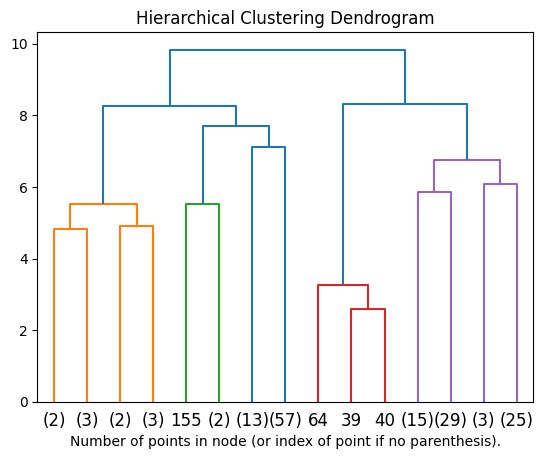

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,
linkage='complete')
model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

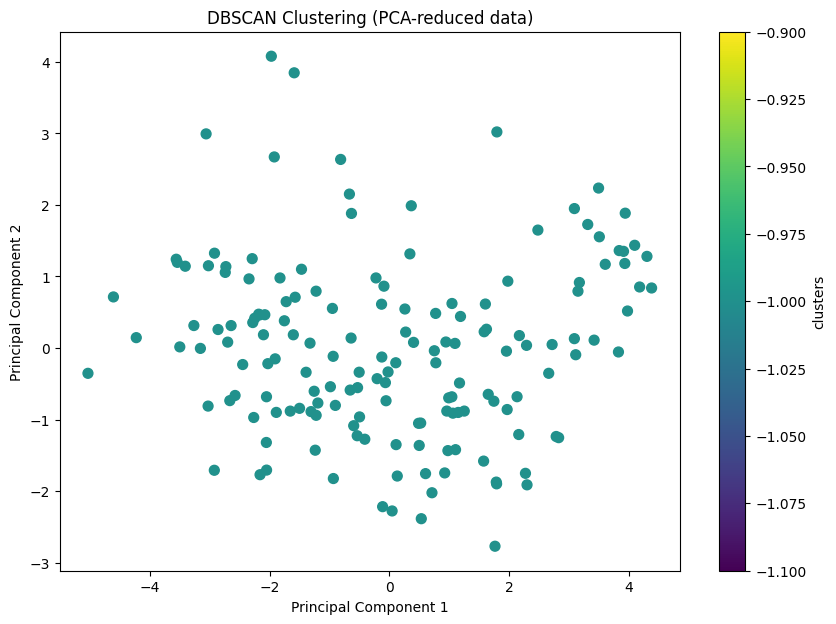

Silhouette Score is not applicable as there is only one cluster or noise.
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877        

In [ ]:
db = DBSCAN(eps=0.5, min_samples=3).fit(X)
labels = db.labels_
clusters = db.fit_predict(X)
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.colorbar(scatter, label='clusters')
plt.title('DBSCAN Clustering (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
if len(set(clusters)) > 1:  # Ensure there are at least 2 clusters for silhouette score
    silhouette_avg = silhouette_score(X, clusters)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score is not applicable as there is only one cluster or noise.")

# Display the DataFrame with cluster labels
print(df.head())